In [1]:
!ls "/kaggle/input/sign-language-eng-alphabet/Images"

A  B  C  D  E  F  G  H	I  K  L  M  N  O  P  Q	R  S  T  U  V  W  X  Y


In [2]:
!pip install split-folders
!pip install tensorflow==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.3/394.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.5 MB/s eta 0:00:00
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77061 sha256=6a2ac828926f0d1f002452d773998629c3ef05b1033967a8a6adc24f474bc80a
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib, splitfolders

2022-07-22 08:06:16.598194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
directory = "/kaggle/input/sign-language-eng-alphabet/Images/"
data_bs = pathlib.Path(directory)
splitfolders.ratio(data_bs, output = "Imgs/", seed = 42, ratio = (0.7, 0.15, 0.15), group_prefix = None)

Copying files: 24000 files [01:28, 270.13 files/s]


In [5]:
ls "/kaggle/working/Imgs/"

test/  train/  val/


In [6]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dir = "/kaggle/working/Imgs/train/"
validation_dir = "/kaggle/working/Imgs/val/"
test_dir = "/kaggle/working/Imgs/test/"



train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 16800 files belonging to 24 classes.


2022-07-22 08:07:49.304373: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-22 08:07:49.308913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-22 08:07:49.401195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 08:07:49.402706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-07-22 08:07:49.402979: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-07-22 08:07:49.455788: I tensorflow/stream_executor/platform/def

Found 3600 files belonging to 24 classes.
Found 3600 files belonging to 24 classes.


2022-07-22 08:07:51.119586: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-22 08:07:51.120483: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000170000 Hz
2022-07-22 08:07:51.685504: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19267584 exceeds 10% of free system memory.


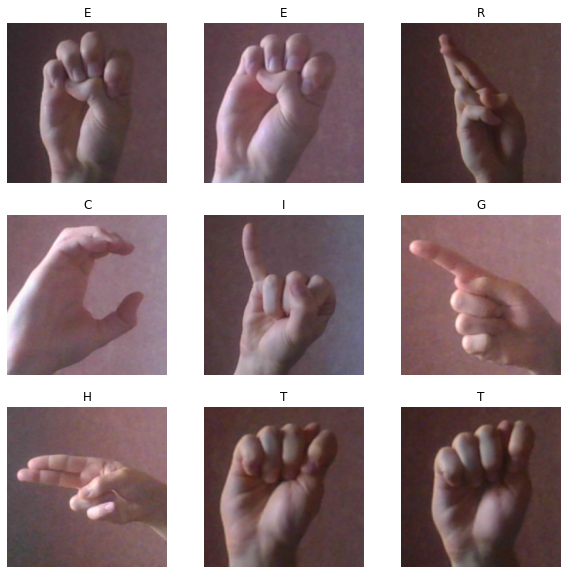

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [10]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(24, activation = "softmax")

In [11]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [12]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset)

Epoch 1/5


2022-07-22 08:07:57.313570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-07-22 08:07:57.890117: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19267584 exceeds 10% of free system memory.
2022-07-22 08:07:57.973226: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19267584 exceeds 10% of free system memory.
2022-07-22 08:07:58.289276: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-07-22 08:07:58.297584: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


  5/525 [..............................] - ETA: 33s - loss: 4.0233 - accuracy: 0.0289

2022-07-22 08:08:04.515346: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19267584 exceeds 10% of free system memory.
2022-07-22 08:08:04.596366: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19267584 exceeds 10% of free system memory.


525/525 [==============================] - 53s 83ms/step - loss: 2.5262 - accuracy: 0.3352 - val_loss: 0.6462 - val_accuracy: 0.9589
Epoch 2/5
525/525 [==============================] - 42s 79ms/step - loss: 0.5752 - accuracy: 0.9335 - val_loss: 0.2566 - val_accuracy: 0.9875
Epoch 3/5
525/525 [==============================] - 42s 80ms/step - loss: 0.2608 - accuracy: 0.9793 - val_loss: 0.1415 - val_accuracy: 0.9956
Epoch 4/5
525/525 [==============================] - 43s 80ms/step - loss: 0.1521 - accuracy: 0.9900 - val_loss: 0.0899 - val_accuracy: 0.9978
Epoch 5/5
525/525 [==============================] - 43s 80ms/step - loss: 0.1012 - accuracy: 0.9946 - val_loss: 0.0621 - val_accuracy: 0.9986


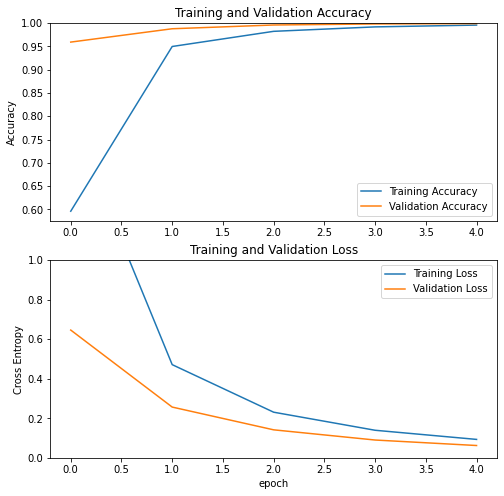

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

113/113 [==============================] - 8s 63ms/step - loss: 0.0629 - accuracy: 0.9994
Test accuracy : 0.9994444251060486


In [16]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)


In [17]:
ans = []

for i in range(len(predictions)):
    ans.append(predictions[i].argmax())

ans = np.array(ans)


In [18]:
print('Predictions:\n', ans)
print('Labels:\n', label_batch)

Predictions:
 [ 7 11 11 20  1  2 13  4  9  9  0 21 11  7  5 20 10 19  1  0  9  0 22  0
 12 20  9 17  4 14  4  6]
Labels:
 [ 7 11 11 20  1  2 13  4  9  9  0 21 11  7  5 20 10 19  1  0  9  0 22  0
 12 20  9 17  4 14  4  6]


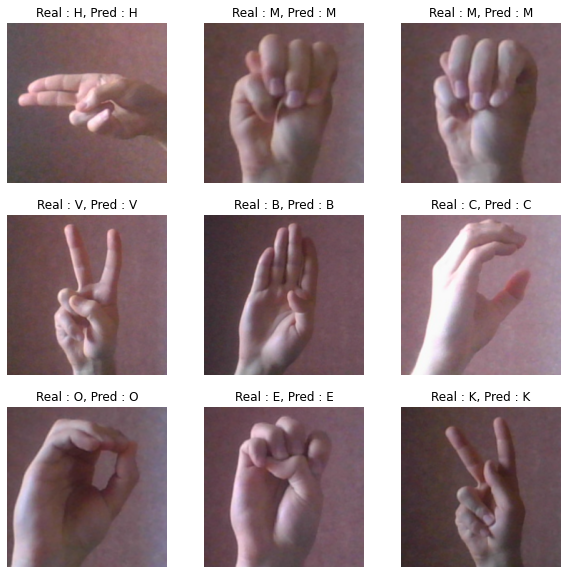

In [19]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(f"Real : {class_names[label_batch[i]]}, Pred : {class_names[ans[i]]}")
    plt.axis("off")